In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/bodyfat.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [ ]:
print("\nDataset Description:")
print(df.describe())


Dataset Description:
          Density     BodyFat         Age      Weight      Height        Neck  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   19.150794   44.884921  178.924405   70.148810   37.992063   
std      0.019031    8.368740   12.602040   29.389160    3.662856    2.430913   
min      0.995000    0.000000   22.000000  118.500000   29.500000   31.100000   
25%      1.041400   12.475000   35.750000  159.000000   68.250000   36.400000   
50%      1.054900   19.200000   43.000000  176.500000   70.000000   38.000000   
75%      1.070400   25.300000   54.000000  197.000000   72.250000   39.425000   
max      1.108900   47.500000   81.000000  363.150000   77.750000   51.200000   

            Chest     Abdomen         Hip       Thigh        Knee       Ankle  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   100.824206   92.555952   99.904762   59.405952   38.590476   23.102381   
std  

In [ ]:
(df.isnull().sum())

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [ ]:
df = df.drop_duplicates()
df = df.dropna()


In [ ]:
print(df.describe())


          Density     BodyFat         Age      Weight      Height        Neck  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   19.150794   44.884921  178.924405   70.148810   37.992063   
std      0.019031    8.368740   12.602040   29.389160    3.662856    2.430913   
min      0.995000    0.000000   22.000000  118.500000   29.500000   31.100000   
25%      1.041400   12.475000   35.750000  159.000000   68.250000   36.400000   
50%      1.054900   19.200000   43.000000  176.500000   70.000000   38.000000   
75%      1.070400   25.300000   54.000000  197.000000   72.250000   39.425000   
max      1.108900   47.500000   81.000000  363.150000   77.750000   51.200000   

            Chest     Abdomen         Hip       Thigh        Knee       Ankle  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   100.824206   92.555952   99.904762   59.405952   38.590476   23.102381   
std      8.430476   10.7830

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

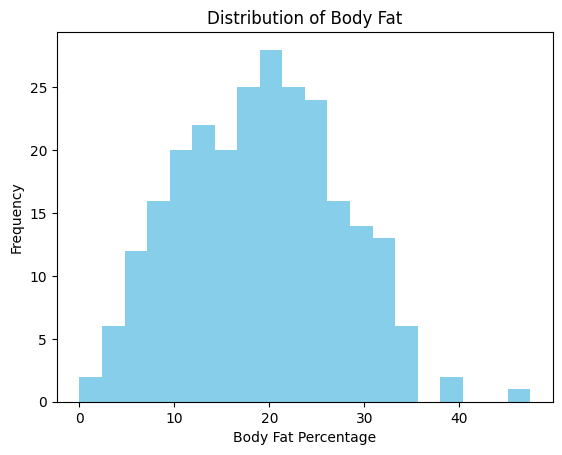

In [ ]:
# Histogram of Body Fat
plt.hist(df['BodyFat'], bins=20, color='skyblue')
plt.xlabel('Body Fat Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Body Fat')
plt.show()

In [ ]:
# Split the dataset into training and testing sets
X = df.drop('BodyFat', axis=1).values
y = df['BodyFat'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)


KNeighborsRegressor()

In [ ]:
# Predict and evaluate KNN
y_pred_knn = knn.predict(X_test_scaled)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

In [ ]:

print("\nKNN Regression (sklearn) - Mean Squared Error:", mse_knn)
print("KNN Regression (sklearn) - R-squared:", r2_knn)


KNN Regression (sklearn) - Mean Squared Error: 10.781615686274511
KNN Regression (sklearn) - R-squared: 0.7682273642798993


In [ ]:
X_b_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Adding bias term
X_b_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [ ]:
theta_best = np.linalg.inv(X_b_train.T.dot(X_b_train)).dot(X_b_train.T).dot(y_train)

In [ ]:
def predict(X, theta):
    return X.dot(theta)

# Predict on the test set
y_pred_lr = predict(X_b_test, theta_best)

In [ ]:
def mean_squared_error_manual(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [ ]:
def r2_score_manual(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

In [ ]:
mse_lr = mean_squared_error_manual(y_test, y_pred_lr)
r2_lr = r2_score_manual(y_test, y_pred_lr)

In [ ]:
print("\nLinear Regression (from scratch) - Mean Squared Error:", mse_lr)
print("Linear Regression (from scratch) - R-squared:", r2_lr)


Linear Regression (from scratch) - Mean Squared Error: 0.3803122094304341
Linear Regression (from scratch) - R-squared: 0.9918244198512436


In [ ]:
#  Hyperparameter Optimization for KNN
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 21)},
             scoring='neg_mean_squared_error')

In [ ]:
print("\nBest Parameters for KNN:", grid_search.best_params_)
print("Best Cross-Validation Score (MSE):", -grid_search.best_score_)


Best Parameters for KNN: {'n_neighbors': 3}
Best Cross-Validation Score (MSE): 13.837175609756097


In [ ]:
# Feature Selection (Correlation-based)
corr_matrix = df.corr()
threshold = 0.7  # Correlation threshold
high_corr_features = [column for column in corr_matrix.columns if abs(corr_matrix['BodyFat'][column]) > threshold and column != 'BodyFat']
print("\nHighly Correlated Features with BodyFat:", high_corr_features)



Highly Correlated Features with BodyFat: ['Density', 'Chest', 'Abdomen']


In [ ]:
X_selected = df[high_corr_features].values
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the data for selected features
X_train_sel_scaled = scaler.fit_transform(X_train_sel)
X_test_sel_scaled = scaler.transform(X_test_sel)

In [ ]:

# Final KNN Model with selected features
final_knn = KNeighborsRegressor(n_neighbors=grid_search.best_params_['n_neighbors'])
final_knn.fit(X_train_sel_scaled, y_train_sel)
y_pred_final_knn = final_knn.predict(X_test_sel_scaled)
mse_final_knn = mean_squared_error(y_test_sel, y_pred_final_knn)
r2_final_knn = r2_score(y_test_sel, y_pred_final_knn)

In [ ]:
print("\nFinal KNN Model (Selected Features) - Mean Squared Error:", mse_final_knn)
print("Final KNN Model (Selected Features) - R-squared:", r2_final_knn)


Final KNN Model (Selected Features) - Mean Squared Error: 1.4911111111111115
Final KNN Model (Selected Features) - R-squared: 0.9679455507940509


In [ ]:
# Final Linear Regression Model (From Scratch with selected features)
X_b_train_sel = np.c_[np.ones((X_train_sel.shape[0], 1)), X_train_sel]  # Add bias term
X_b_test_sel = np.c_[np.ones((X_test_sel.shape[0], 1)), X_test_sel]     # Add bias term
theta_best_sel = np.linalg.inv(X_b_train_sel.T.dot(X_b_train_sel)).dot(X_b_train_sel.T).dot(y_train_sel)
y_pred_final_lr = predict(X_b_test_sel, theta_best_sel)
mse_final_lr = mean_squared_error_manual(y_test_sel, y_pred_final_lr)
r2_final_lr = r2_score_manual(y_test_sel, y_pred_final_lr)

In [ ]:
print("\nFinal Linear Regression (from scratch, selected features) - Mean Squared Error:", mse_final_lr)
print("Final Linear Regression (from scratch, selected features) - R-squared:", r2_final_lr)


Final Linear Regression (from scratch, selected features) - Mean Squared Error: 0.26804167259430345
Final Linear Regression (from scratch, selected features) - R-squared: 0.9942379021152559
